In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [17]:
N = 20

# random inputs in (-5, 5)
X = np.random.random(N) * 10 - 5

Y = 0.5 * X - 1 + np.random.randn(N)

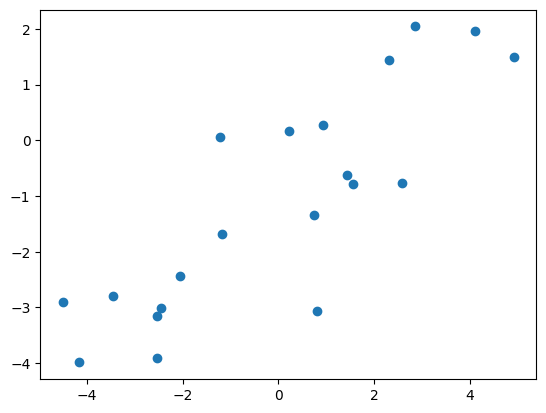

In [18]:
plt.scatter(X, Y)

In [19]:
model = nn.Linear(1, 1)

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
# changing shape
# (n_samples, n_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [22]:
type(inputs)

torch.Tensor

In [23]:
# train the model

n_epochs = 30
losses = []

for it in range(n_epochs):

  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()


  print(f'Epoch: {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch: 1/30, Loss: 6.4896
Epoch: 2/30, Loss: 5.2625
Epoch: 3/30, Loss: 4.3532
Epoch: 4/30, Loss: 3.6776
Epoch: 5/30, Loss: 3.1738
Epoch: 6/30, Loss: 2.7963
Epoch: 7/30, Loss: 2.5120
Epoch: 8/30, Loss: 2.2962
Epoch: 9/30, Loss: 2.1311
Epoch: 10/30, Loss: 2.0033
Epoch: 11/30, Loss: 1.9034
Epoch: 12/30, Loss: 1.8240
Epoch: 13/30, Loss: 1.7600
Epoch: 14/30, Loss: 1.7074
Epoch: 15/30, Loss: 1.6636
Epoch: 16/30, Loss: 1.6263
Epoch: 17/30, Loss: 1.5940
Epoch: 18/30, Loss: 1.5656
Epoch: 19/30, Loss: 1.5402
Epoch: 20/30, Loss: 1.5172
Epoch: 21/30, Loss: 1.4962
Epoch: 22/30, Loss: 1.4768
Epoch: 23/30, Loss: 1.4586
Epoch: 24/30, Loss: 1.4416
Epoch: 25/30, Loss: 1.4256
Epoch: 26/30, Loss: 1.4105
Epoch: 27/30, Loss: 1.3960
Epoch: 28/30, Loss: 1.3823
Epoch: 29/30, Loss: 1.3692
Epoch: 30/30, Loss: 1.3567


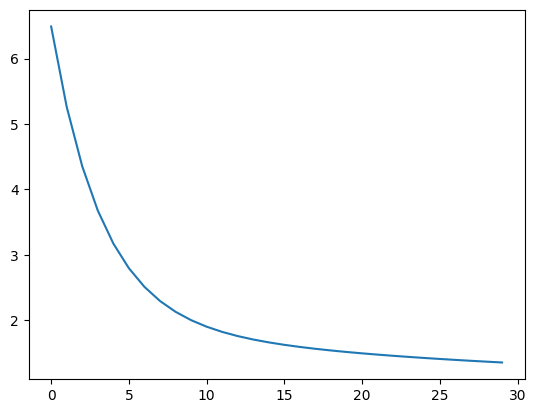

In [24]:
# loss per iteration
plt.plot(losses);

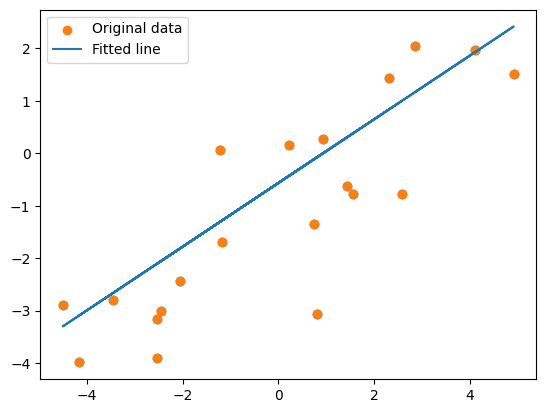

In [25]:
# plot graph of predictions
plt.scatter(X, Y)
predictions = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predictions, label='Fitted line')

plt.legend()

In [26]:
# true values of (w, b) are (0.5, -1)

w = model.weight.data.numpy()
b = model.bias.data.numpy()

w, b

(array([[0.60709405]], dtype=float32), array([-0.56539214], dtype=float32))